<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Deep_Residual_Learning_for_Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Residual Learning for Image Recognition**

논문 링크: https://arxiv.org/abs/1512.03385

ResNet은 microsoft에서 개발한 모델이며, 2016년도에 CVPR에서 발표된 논문이다. 또한 ResNet은 **2015년에 개최된 ILSVRC(ImageNet Large Scale Visual Recognition Challenge)에서 우승**을 차지한 신경망(CNN)구조이다. 또한, 이 모델은 성는만 좋은 것이 아닌 매우 간단한데, 2014년에 개최된 ILSVRC에서 우승한 **GoogLeNet**과 비교하면 얼마나 쉬운지 체감이 된다.

GoogLeNet이 22층인 것에 비해 ResNet은 152층의 네트워크로 **약 7배나 깊어졌다.**

***Is learning better networks as easy as stacking more layers?***
(그러면 과연 층이 깊을수록 모델 학습이 잘 될까?)

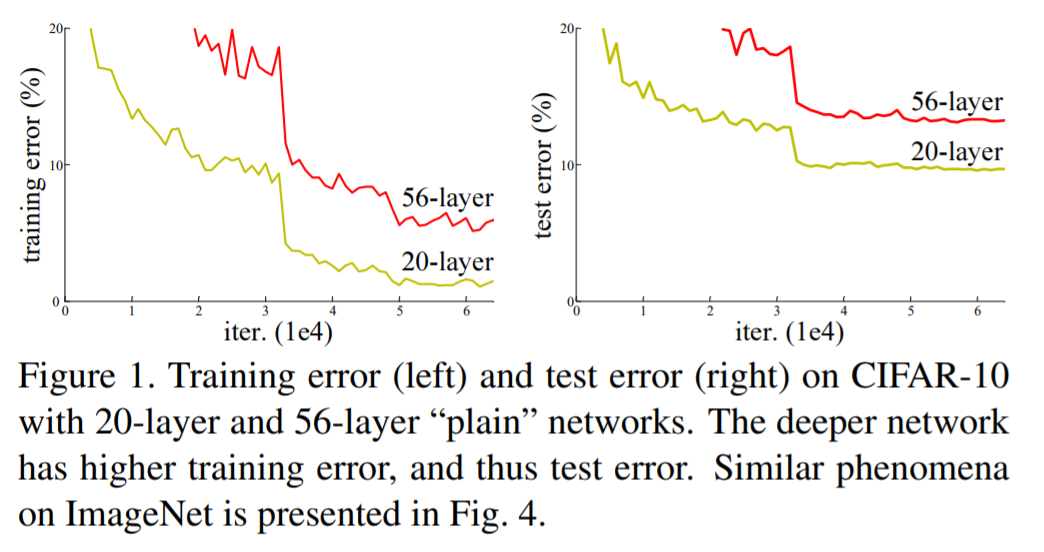

정답은 "No"이다. 위의 그림의 **plain networks**는 VGGNet을 참고하여 Convolution layer와 fully-connected layer을 쌓아 ResNet 연구팀이 임의로 만든 네트워크이다. 이 그림에서 중요한 점은 레이어를 깊이 쌓았을 때의 문제점이 단순 Overfitting이 아닌, **층이 깊어지면, Test에서의 정확도만 줄어드는 것이 아니라, Train에서도 낮은 층보다 정확도가 낮은 것을 확인할 수 있다.**

이는 **gradient vanishing/exploding** 문제 때문에 학습이 잘 이루어지지 않기 때문이다.

gradient vanishing이란 layer가 깊어질수록 미분이 점점 많이 하기 때문에 **backprogation을 해도 앞의 layer일수록 미분값이 작아지기 때문에 output에 영향을 끼치는 weight 정도가 작아지는 것**을 뜻한다.

이는 **Overfitting**과는 다른 문제인데, 위에서 그림과 같이 설명한 것처럼, Test 성능에서만 안좋은 결과를 보인 것이 아니라 **Degradation** 문제로 Train 성능에서도 잘 학습이 안됬기 때문이다.

이러한 문제를 해결하기 위하여 ResNet 연구팀은 **residual learning**이라는 새로운 아이디어를 제안하였다.

## **ResNet 구조**

기존의 neural network의 학습 목적은 input(x)를 target(y)로 mapping하는 함수 H(x)를 찾는 것이었다.

따라서 H(x)-y를 최소화하는 방향으로 학습을 진행한다.

예시를 들면, 강아지와 고양이를 image classification하는 경우, x에 대한 target(y)는 사실 x를 대변하는 것이므로 y와 x의 의미가 같게끔 mapping해야한다. 즉, 강아지의 사진이 pixel값이 input(x)로 주어질때 이를 2개의 label중 강아지가 1에 해당하면 target(y)를 1로 정해서 학습하는 것이 아닌, 강아지 사진의 pixel값 (x)로 y를 mapping해야한다. 따라서 **network의 출력값이 x가 되도록 H(x)-x를 최소화하는 방향으로 학습**을 진행한다.

**F(x) = H(x) - x를 잔차(residual)**라 하며, 이 잔차를 학습하는 것을 **Residual Learning**이라 한다.

### **Residual Learning**

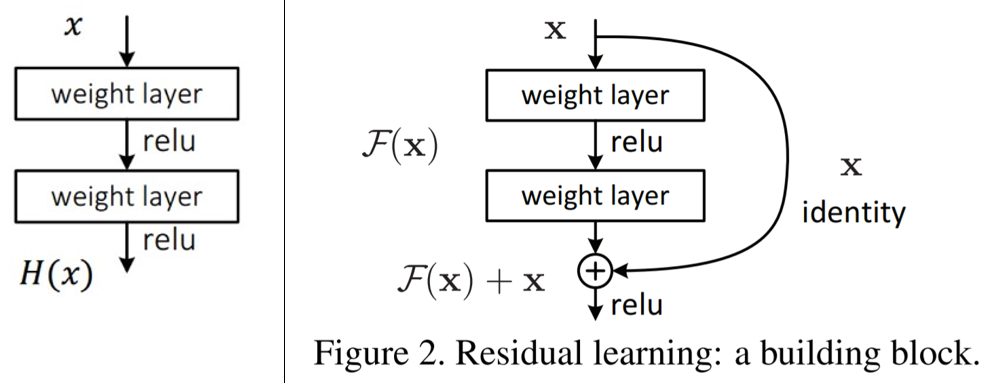

위의 그림에서 왼쪽과 같이 network output이 x가 되도록 mapping하는 것이 아닌, 오른쪽과 같이 마지막에 x를 더하여 네트워크의 output은 0이 되도록 mapping해서 최종 output이 x가 되도록 학습한다.

그 이유는 왼쪽 그림처럼 단순히 H(x)가 x가 되도록 residual learning으로 학습해도 **결국 gradient vanishing 문제가 해결된 것은 아니다.** 

따라서 네트워크는 0이 되도록 학습시키고 마지막에 x를 더해서 H(x)가 x가 되도록 학습하면 미분을 해도 x자체는 미분값 1을 갖기 때문에 각 layer마다 **최소 gradient로 1은 갖도록 한 것이다.**

1. **이미지에서 H(x) = x가 되도록 학습시킨다.**
2. **네트워크의 output F(x)는 0이 되도록 학습시킨다.**
3. **F(x) + x = H(x) = x가 되도록 학습시키면 미분해도 F(x) + x의 미분값은 F'(x) + 1이기 때문에 최소 1이상이다.**
4. **모든 Layer에서의 gradient가 최소 1이상의 값을 가지기 때문에 gradient vanishing현상을 해결했다.**

결과적으로 위 1~4로 인하여 gradient vanishing 문제를 해결했다.

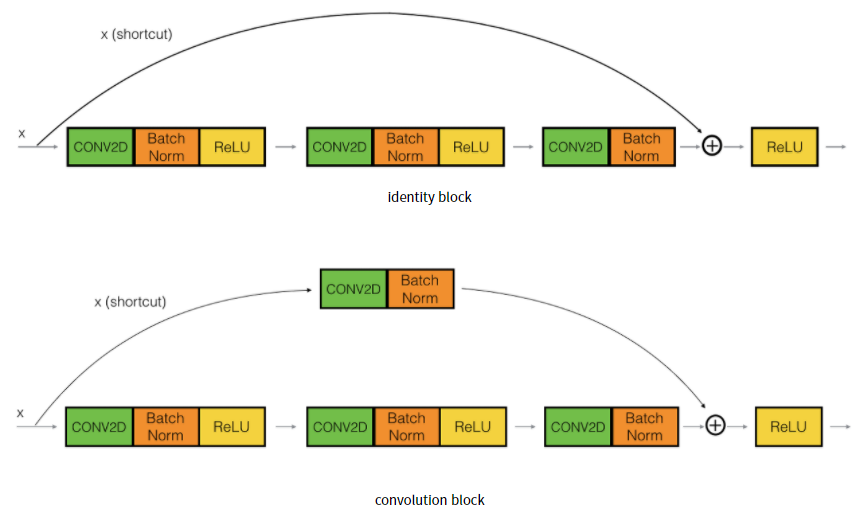

이렇게 **skip connection** 혹은 **shortcut connection**으로 만든 block을 **identity block**이라고 한다. 그리고 ResNet은 위의 그림에 나와있는 identity block과 convolution block으로 구성되어 있다.

단순히 **identity block**은 이전까지 설명했듯이 네트워크의 output F(x)에 x를 그대로 더하는 것이고, **convolution block**은 x역시 1x1 convolution연산을 거친 후 F(x)에 대해주는 것이다.

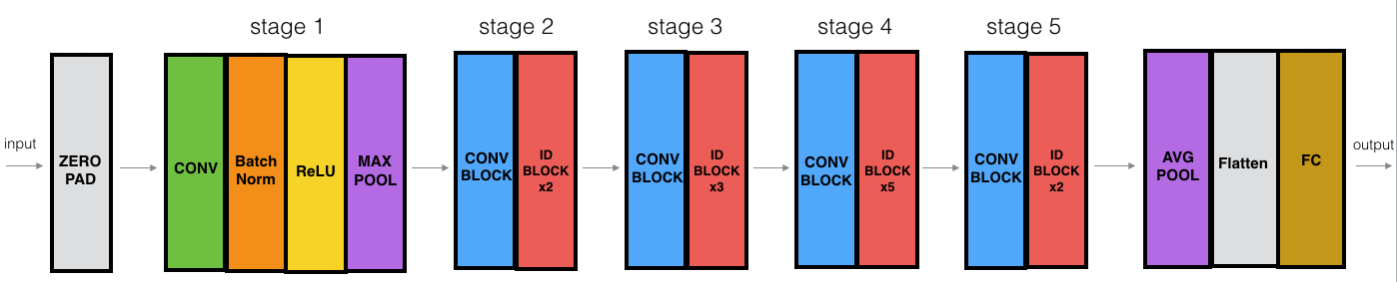

그리고 ResNet은 이 두가지 block을 위의 그림과 같이 쌓아서 구성한다.

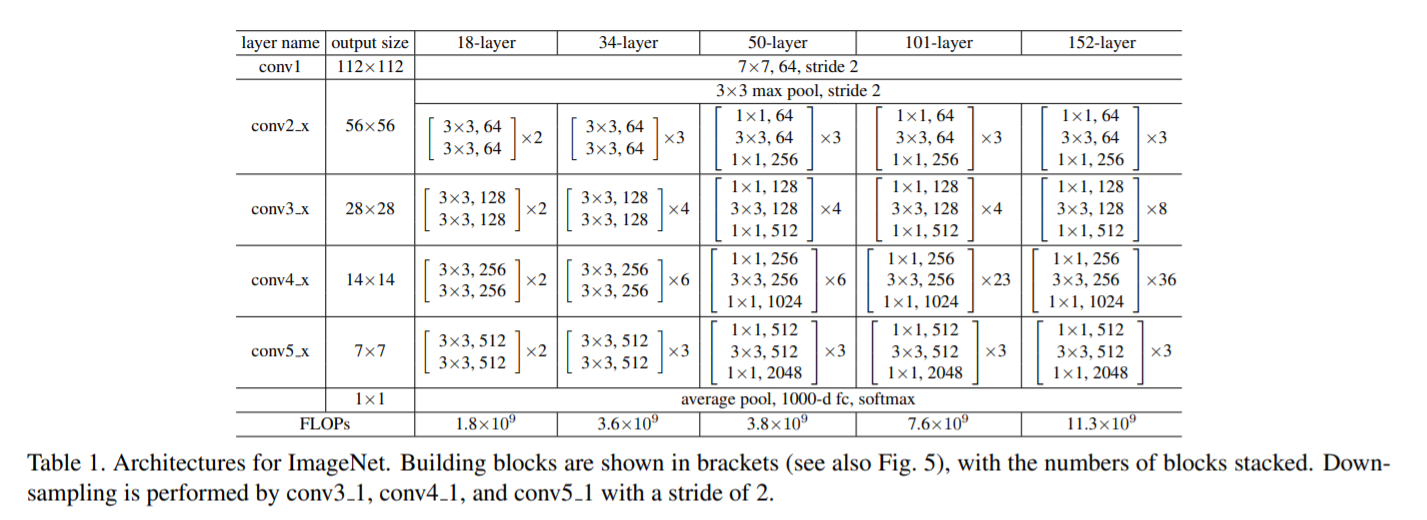

또한 ResNet의 파라미터 구조는 위의 그림과 같다.

ResNet-101의 경우 각 stage마다 convolution block이 1개씩 존재한다.

따라서 위의 그림을 참고하면 identity block은 각 stage에서 2, 3, 22, 2개씩 존재한다.

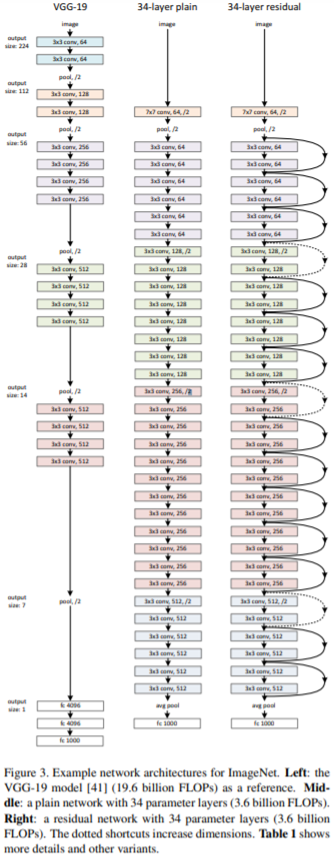

앞에선 Residual learning에 대해서 설명을 했는데, ResNet은 기본적으로 VGGNet에서 나온 3x3 convolution layer와 같이 작은 망들의 장점을 활용했다.

위의 그림은 기본 VGGNet-19를 참고하여 만든 34 layer짜리 plain network와 residual block를 활용하여 만든 34 layer짜리 ResNet이다.

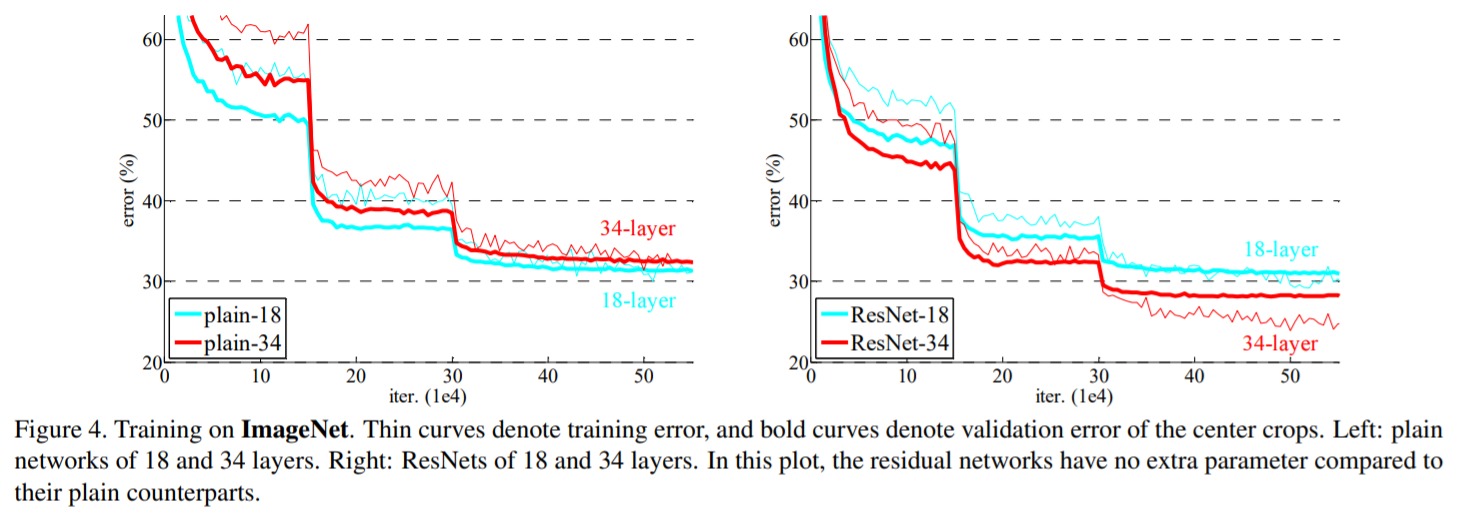

이 네트워크들로 ImageNet 데이터셋을 활용하여 학습한 결과, residual learning을 활용한 ResNet의 경우 층이 깊어져도 train error가 적어지는 것을 확인할 수 있었다.

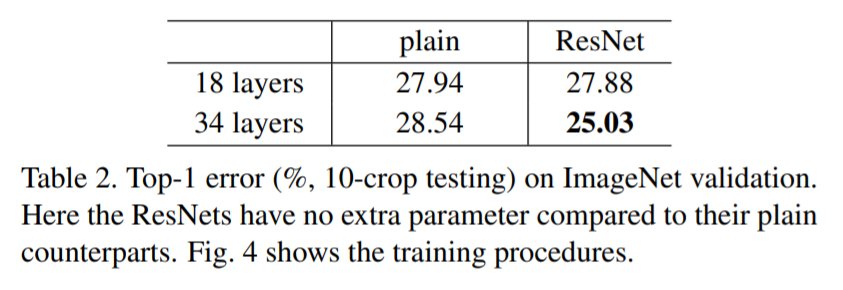

위의 표는 바로 위에서 보여준 그림의 에러율이다.

### **Pytorch**

In [1]:
import torch
import torch.nn as nn


class block(nn.Module):
    def __init__(self, in_channels, intermediate_channels, identity_downsample=None, stride=1):
        super(block, self).__init__()

        self.expansion = 4
        self.conv1 = nn.Conv2d(in_channels, intermediate_channels, kernel_size=1, stride=1, padding=0)
        self.bn1 = nn.BatchNorm2d(intermediate_channels)
        self.conv2 = nn.Conv2d(intermediate_channels, intermediate_channels, kernel_size=3, stride=stride, padding=1,)
        self.bn2 = nn.BatchNorm2d(intermediate_channels)
        self.conv3 = nn.Conv2d(intermediate_channels, intermediate_channels * self.expansion, kernel_size=1, stride=1, padding=0,)
        self.bn3 = nn.BatchNorm2d(intermediate_channels * self.expansion)
        self.relu = nn.ReLU()
        self.identity_downsample = identity_downsample
        self.stride = stride

    def forward(self, x):
        identity = x.clone()

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.conv3(x)
        x = self.bn3(x)

        if self.identity_downsample is not None:
            identity = self.identity_downsample(identity)

        x += identity
        x = self.relu(x)
        return x